In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import sacpy.Map
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [2]:
sstag = np.load("./data/sstag.npy")
ssta = np.load("./data/ssta.npy")
heatbar = np.load("./data/mlhba.npy") 

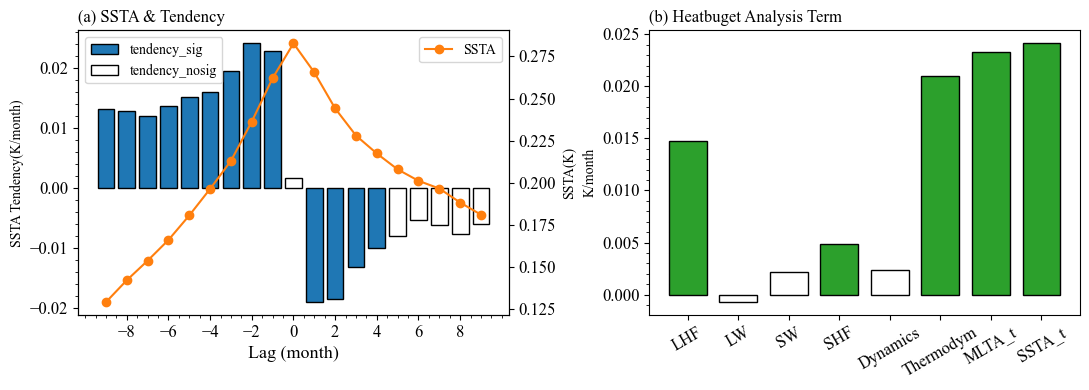

In [7]:
fig = plt.figure(figsize=[11,4])
plt.rc('xtick', labelsize=12) #fontsize of the x tick labels
plt.rc('ytick', labelsize=12) #fontsize of the y tick labels
#  ======================= ax1 =====================
ax = fig.add_subplot(1,2,1)
# color 
sp_color = "C0"
# color_ls = []
# for pvalue in sstag[1]:
#     if pvalue >= 0.05:
#         color_ls.append("none")
#     else:
#         color_ls.append(sp_color)
x = np.arange(-9,10)
x0 = x[sstag[1]<=0.05]
y0 = sstag[0][sstag[1]<=0.05]
x1 = x[sstag[1]>0.05]
y1 = sstag[0][sstag[1] > 0.05]
# plt.bar(x,np.gradient(reg_ssta_ls.T[0]),color=color_ls,edgecolor="black")
l1 = ax.bar(x0,y0,color=sp_color,edgecolor="black",label="tendency_sig")
l2 = ax.bar(x1,y1,color="none",edgecolor="black",label="tendency_nosig")
ax.legend(loc=2)
ax.minorticks_on()
ax.set_ylabel("SSTA Tendency(K/month)")
ax.set_xlabel("Lag (month)",fontdict={"fontsize":13})
ax.set_title("(a) SSTA & Tendency",loc="left")
ax2 = ax.twinx()
l2 = ax2.plot(x,ssta[0],"-o",color="C1",label="SSTA")
ax2.legend(loc=1)
ax2.set_ylabel("SSTA(K)")
ax2.set_xticks(x[1::2])

#  ======================= ax2 =====================
ax = fig.add_subplot(1,2,2)
color_ls = ["C2"]*8
color_ls[1],color_ls[2],color_ls[4] = ['none']*3
x = np.arange(8)
ax.bar(np.arange(8),heatbar,width=0.75,color=color_ls,edgecolor="black")
ax.set_xticks(x)
ax.set_xticklabels(["LHF","LW","SW","SHF","Dynamics","Thermodym","MLTA_t","SSTA_t"],rotation=30)
# ax.ylabel("K/month")
ax.set_ylabel("K/month")
ax.set_title("(b) Heatbuget Analysis Term",loc="left")
ax.yaxis.set_minor_locator(MultipleLocator(0.001))
# ax.set_xlabel("Heatbuget term")
plt.tight_layout()
plt.savefig("./pic/Fig2.png",dpi=300)